Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
# finding number of images in Train & Test folder
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [5]:
#Finding all skin cancer names
cancer_names = np.array([item.name for item in data_dir_train.glob('*')])
cancer_names

array(['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus',
       'basal cell carcinoma', 'actinic keratosis',
       'squamous cell carcinoma', 'vascular lesion',
       'seborrheic keratosis', 'dermatofibroma'], dtype='<U26')

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180
IMG_ROWS = 28
IMG_COLS = 28

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_height),
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_height),
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
NUM_CLASSES = len(class_names)
NUM_CLASSES

9

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

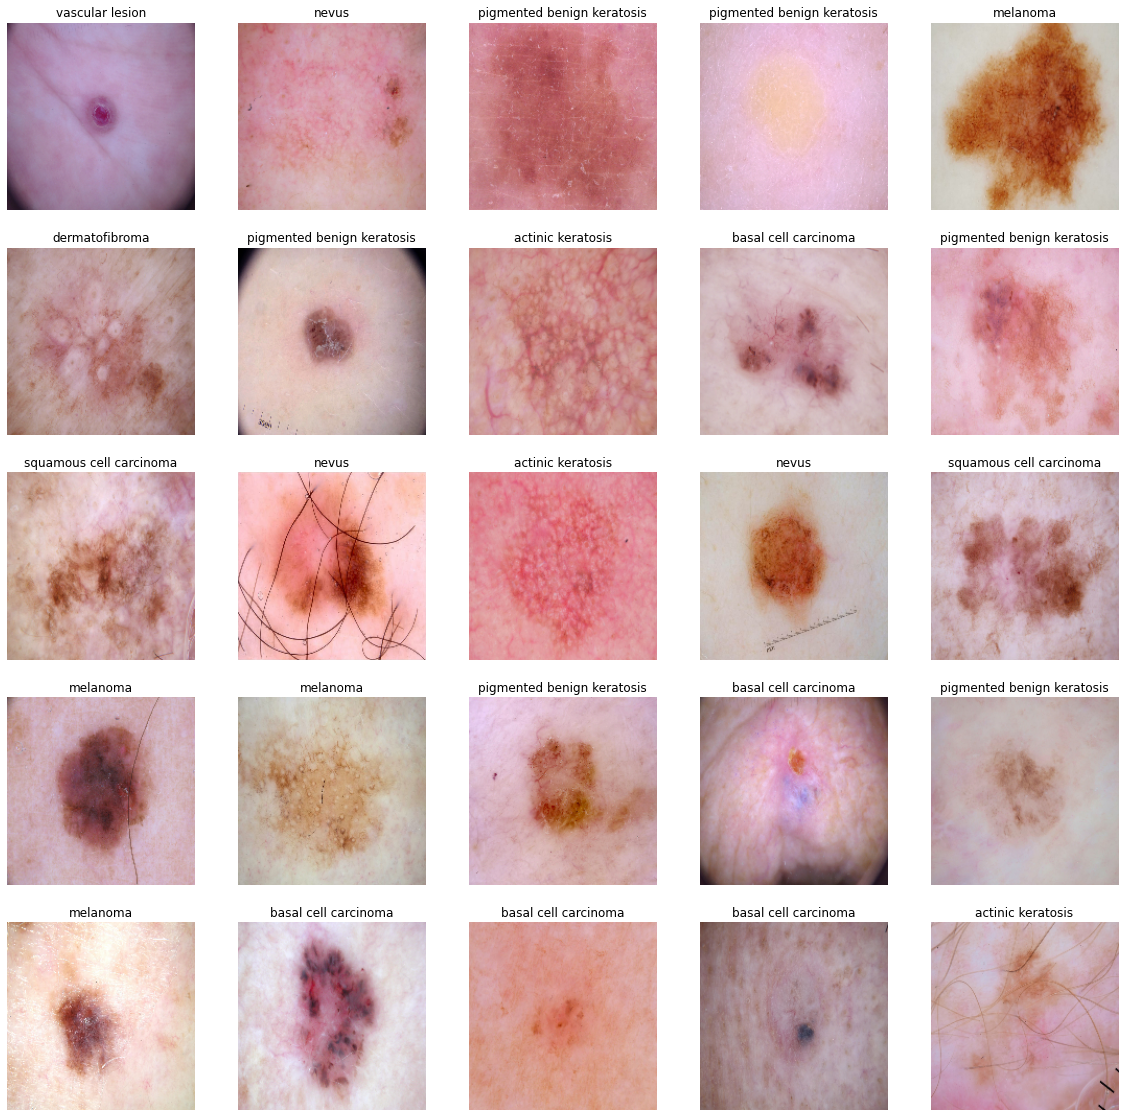

In [11]:
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off") 

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 92s 2s/step - loss: 3.1691 - accuracy: 0.2539 - val_loss: 1.7625 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 51s 911ms/step - loss: 1.7063 - accuracy: 0.3722 - val_loss: 1.5523 - val_accuracy: 0.4922
Epoch 3/20
56/56 [==============================] - 81s 1s/step - loss: 1.5416 - accuracy: 0.4704 - val_loss: 1.6414 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.4439 - accuracy: 0.4900 - val_loss: 1.6070 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 78s 1s/step - loss: 1.3938 - accuracy: 0.5078 - val_loss: 1.4759 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 71s 1s/step - loss: 1.2940 - accuracy: 0.5396 - val_loss: 1.5311 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 73s 1s/step - loss: 1.2562 - accuracy: 0.5586 - val_loss: 1.7150 - val_accuracy: 0.5011
Epoch 8/20
56/56 

### Visualizing training results

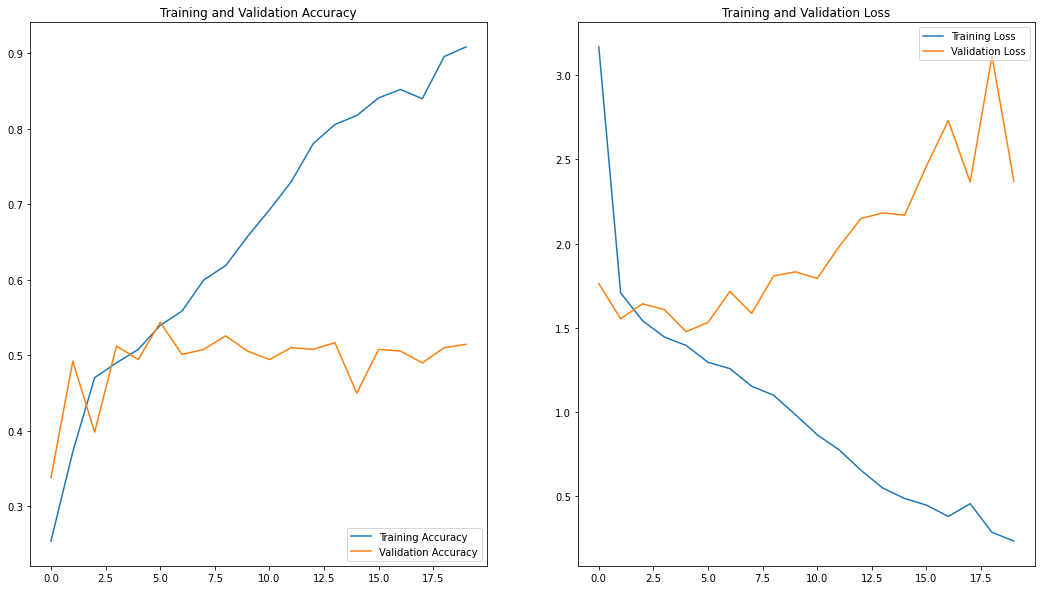

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [18]:
# Finding Validation Accuracy
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

14/14 [==============================] - 4s 317ms/step - loss: 2.3719 - accuracy: 0.5145
Accuracy 0.5145413875579834


- In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 51% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.
- Validation Loss is consistantly increasing.
- To overcome the overfitting in training process. we'll use data augmentation and add Dropout to our model.

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2,0.3),
    layers.RandomContrast(0.2),
  ]
)

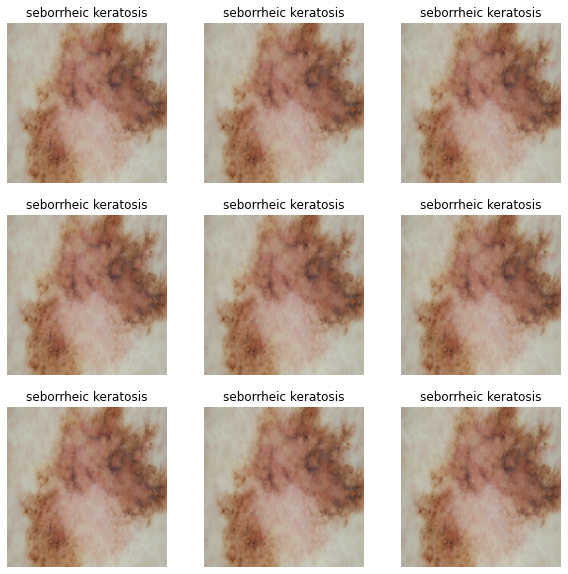

In [51]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title(class_names[labels[0]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
      data_augmentation,
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(128, 3, activation='relu'),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(NUM_CLASSES, activation="softmax")
])

### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 83s 1s/step - loss: 3.3826 - accuracy: 0.2344 - val_loss: 2.1752 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 82s 1s/step - loss: 2.0044 - accuracy: 0.2746 - val_loss: 1.7853 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 91s 2s/step - loss: 1.7709 - accuracy: 0.3756 - val_loss: 1.6350 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 81s 1s/step - loss: 1.7383 - accuracy: 0.4012 - val_loss: 1.5448 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 81s 1s/step - loss: 1.6386 - accuracy: 0.4191 - val_loss: 1.6464 - val_accuracy: 0.4340
Epoch 6/20
56/56 [==============================] - 82s 1s/step - loss: 1.5674 - accuracy: 0.4721 - val_loss: 1.5569 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 88s 2s/step - loss: 1.6874 - accuracy: 0.4012 - val_loss: 1.7111 - val_accuracy: 0.4743
Epoch 8/20
56/56 [==

### Visualizing the results

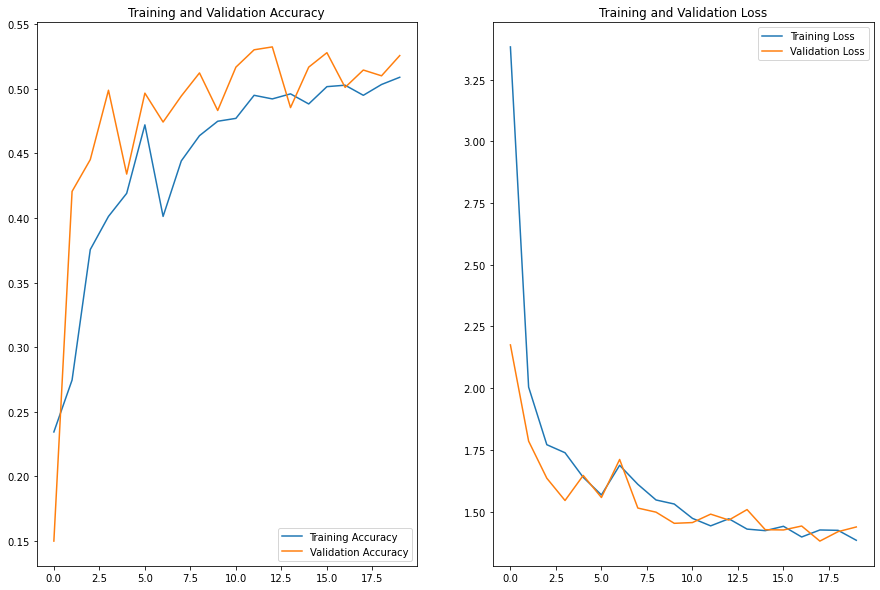

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [26]:
# Finding the Validation Accuracy
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

14/14 [==============================] - 4s 264ms/step - loss: 1.4375 - accuracy: 0.5257
Accuracy 0.5257270932197571


- From the above graph between training accuracy and validation accuracy difference is very less as compare to earlier graph.
- But traning accuracy itself is very less around 52% so that some modification required.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
from glob import glob

path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list_original)

2239

In [28]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*/*.jpg'))]
len(lesion_list_original)

2239

In [29]:
dataframe_dict = dict(zip(path_list_original, lesion_list_original))
len(dataframe_dict.values())

2239

In [30]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2235,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2236,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2237,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


<BarContainer object of 9 artists>

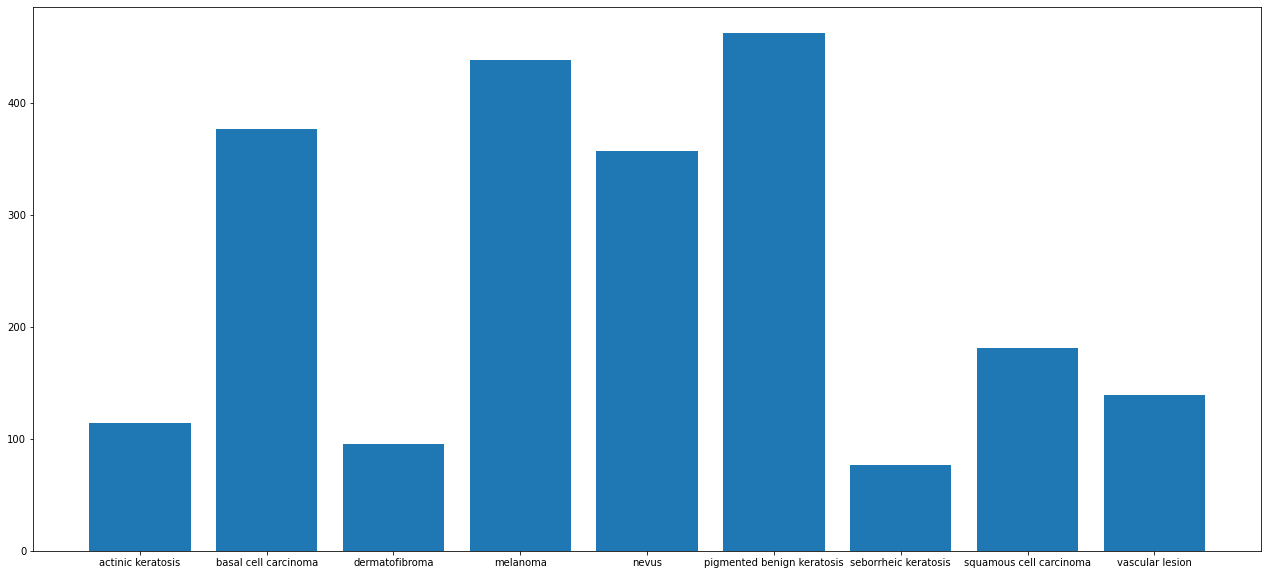

In [31]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(22,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- ANS: Seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
- ANS: Pigmented Benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
# !pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB21A9BB0>: 100%|██████████| 500/500 [00:04<00:00, 113.15 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB2310700>:   0%|          | 1/500 [00:00<01:20,  6.18 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB2038CD0>: 100%|██████████| 500/500 [00:04<00:00, 100.62 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB219AAC0>: 100%|██████████| 500/500 [00:05<00:00, 86.58 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=963x629 at 0x7FDEB21A0340>: 100%|██████████| 500/500 [00:33<00:00, 14.92 Samples/s]   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB2CAF3A0>: 100%|██████████| 500/500 [00:23<00:00, 21.00 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB200B730>:   0%|          | 1/500 [00:00<01:35,  5.23 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB2419850>: 100%|██████████| 500/500 [00:04<00:00, 116.64 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDEB2CA9640>: 100%|██████████| 500/500 [00:10<00:00, 45.73 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDEB2C92850>: 100%|██████████| 500/500 [00:04<00:00, 103.01 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDEB2CA97C0>: 100%|██████████| 500/500 [00:04<00:00, 110.74 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
len(dataframe_dict_new)

4500

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [39]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
# "path to directory with training data + data created using augmentor"
data_dir_train = path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here
model = Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(NUM_CLASSES, activation="softmax")
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

#### **Todo:**  Train your model

In [45]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 183s 1s/step - loss: 2.8153 - accuracy: 0.2554 - val_loss: 1.6901 - val_accuracy: 0.3690
Epoch 2/20
169/169 [==============================] - 169s 996ms/step - loss: 1.6105 - accuracy: 0.3902 - val_loss: 1.5625 - val_accuracy: 0.4157
Epoch 3/20
169/169 [==============================] - 171s 1s/step - loss: 1.4544 - accuracy: 0.4462 - val_loss: 1.3945 - val_accuracy: 0.4826
Epoch 4/20
169/169 [==============================] - 159s 937ms/step - loss: 1.2752 - accuracy: 0.5280 - val_loss: 1.2407 - val_accuracy: 0.5464
Epoch 5/20
169/169 [==============================] - 151s 889ms/step - loss: 1.1063 - accuracy: 0.5879 - val_loss: 1.2507 - val_accuracy: 0.5739
Epoch 6/20
169/169 [==============================] - 149s 878ms/step - loss: 1.0149 - accuracy: 0.6311 - val_loss: 1.2043 - val_accuracy: 0.5642
Epoch 7/20
169/169 [==============================] - 167s 982ms/step - loss: 0.9233 - accuracy: 0.6625 - val_loss: 1.1262 - val_a

#### **Todo:**  Visualize the model results

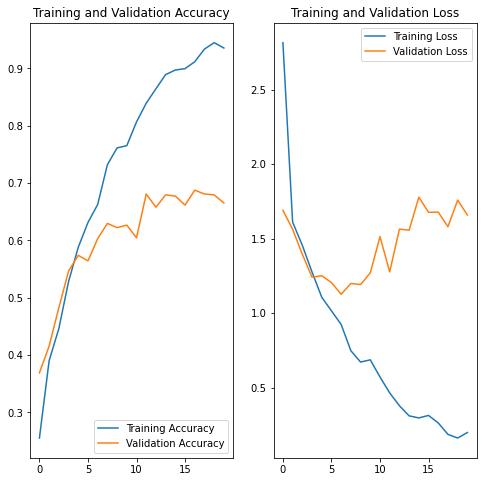

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [47]:
# Finding Validation Accuracy
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

43/43 [==============================] - 10s 205ms/step - loss: 1.6582 - accuracy: 0.6652
Accuracy 0.6651818752288818


- Validation accuracy:- around 65 to 70%
- After using Augmentor, model get rid of overfitting.
- Yes Class rebalance is helpful.
- After increasing epochs 30 or 50 from 20 validation accuracy is drops.